# Juliaで学ぶタイトバインディング模型とトポロジカル物質
## 
2022年3月21日 Julia 1.6以降で動作確認

## 1. タイトバインディング模型とは何か？
一次元シュレーディンガー方程式から始めて、タイトバインディング（強束縛）模型について理解することが目的である。  
一次元シュレーディンガー方程式をなんとなく知っている程度で理解できるように書いたつもりである。  
もし一次元シュレーディンガー方程式に馴染みがない場合には、
「Juliaで学ぶ量子力学」  
https://github.com/cometscome/QM   
を参考にすると良いかもしれない。


#### シュレーディンガー方程式から固体物理学へ
一次元シュレーディンガー方程式から始めて、固体中での電子の挙動について調べてみよう。
まず、固体中には原子が規則正しく並んでおり、原子は電子と原子核からなる。電子はマイナス、原子核はプラスの電荷を帯びているので、両者は引きつけあっている。電子から見ると、原子核の引き寄せの効果は引力ポテンシャルとして感じられる。量子力学の教科書で習うように、水素原子の場合には厳密に解くことができ、電子が水素原子核のまわりに束縛されていることがわかる。他の原子でも同様に、原子核は電子を束縛している。
さて、ここで、原子を二つ並べて、だんだんと近づけていくと何が起こるだろうか？ 固体とは原子が規則正しく並んだものであり、原子同士が近くにあることが重要なはずである。原子二つの場合を見てから、一次元的に規則正しく並んだ場合を考えてみよう。もちろん、三次元的に並んでいるのが固体であるが、基本的な方針は変わらない。


### 1.1 束縛状態を持つ1次元シュレーディンガー方程式
#### 1.1.1 ポテンシャルを一つ持つ場合の束縛状態
一次元系のシュレーディンガー方程式は、
$$
\left( -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x) \right) \psi(x) = \epsilon \psi(x)
$$
である。無次元化しておくと、
$$
\left( -\frac{d^2}{dx^2} + V(x) \right) \psi(x) = \epsilon \psi(x)
$$
である。
ここで、
$$
V(x) = V_0 \exp(-x^2)
$$

In [1]:
V0 = -5.0
V(x) =  V0*exp(-x^2)

V (generic function with 1 method)

というポテンシャルを考える。  
形は

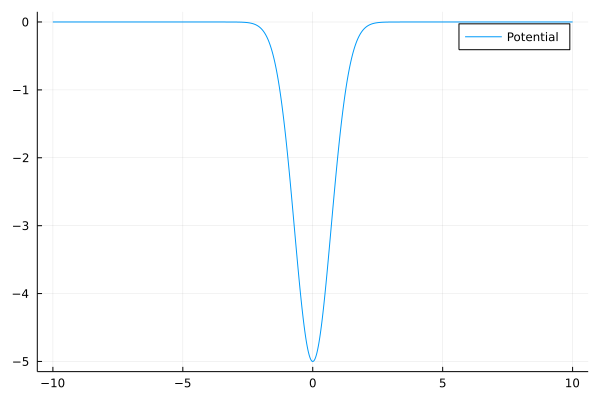

In [2]:
using Plots
N = 1000
xmax = 10.0
xmin = -10.0
xvec = range(xmin,xmax,length=N)
plot(xvec,V.(xvec),label="Potential")

である。
このポテンシャルを入れてシュレーディンガー方程式を解く。
ここで、空間を差分化して、ハミルトニアンを行列：

In [3]:
function make_H1d(N,xmax,xmin,V)
    mat_H = zeros(Float64,N,N)
#    V(x) =  -V0*exp(-x^2/ξ^2)
    a = (xmax-xmin)/(N-1)
        
    for i in 1:N
        x = (i-1)*a + xmin
        for dx in -1:1
            j = i + dx
            v = 0.0
            if dx == 0                
                v = (2/a^2 + V(x))
            elseif dx == 1
                v = -1/a^2
            elseif dx == -1
                v = -1/a^2
            end
            
            if 1 <= j <= N
                mat_H[i,j] = v
            end
            
        end
        
    end
    
    return mat_H
end

make_H1d (generic function with 1 method)

とすることで、行列の対角化を行えばシュレーディンガー方程式を解くことができる。  
実際に解いてエネルギー固有値を見てみると、

In [5]:
using LinearAlgebra
mat_H = make_H1d(N,xmax,xmin,V) 
energy,mat_v = eigen(mat_H)
println(energy[1:10])

[-3.1404009040145286, -0.4062142205546486, 0.10339356506001751, 0.15632796480264988, 0.4145932097452478, 0.5822287366538306, 0.9363743175283377, 1.2355092013437883, 1.6711811288154879, 2.0989689480359477]


となる。最低エネルギー固有値の固有関数は

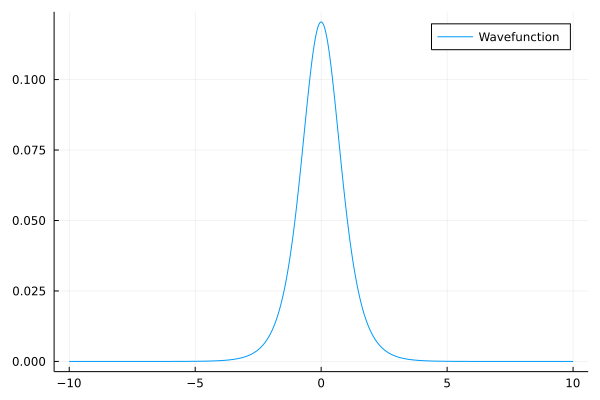

In [6]:
using Plots
plot(xvec,[mat_v[:,1]],label="Wavefunction")

となり、ポテンシャルに束縛されている。  
#### 1.1.2 ポテンシャルを二つ持つ場合の束縛状態:遠い場合
次に、このポテンシャルを二つ並べてみよう。$x = \pm x_0$の二点にガウス関数を設定する。
$$
V(x) = V_0 (\exp(-(x-x0)^2) + \exp(-(x+x_0)^2))
$$

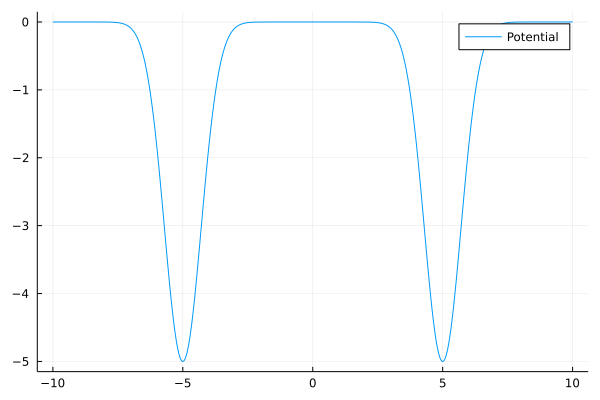

In [7]:
x0 = 5
V2(x) =  V0*(exp(-(x-x0)^2)+exp(-(x+x0)^2))
plot(xvec,V2.(xvec),label="Potential")

$x_0$が大きければポテンシャル同士は離れているため、それぞれを別々に解いた場合と固有値は変わらない。

In [8]:
mat_H2 = make_H1d(N,xmax,xmin,V2) 
energy2p,mat_v2 = eigen(mat_H2)
println("ポテンシャル二つの時のエネルギー")
println(energy2p[1:10])
println("ポテンシャル一つの時のエネルギー")
println(energy[1:10])

ポテンシャル二つの時のエネルギー
[-3.140400933741141, -3.140400065868767, -0.40629704558980606, -0.39915370914881443, 0.16695946318332, 0.43793595314145595, 0.6183564602667886, 0.8782890894556825, 1.318612572162074, 1.780767230755412]
ポテンシャル一つの時のエネルギー
[-3.1404009040145286, -0.4062142205546486, 0.10339356506001751, 0.15632796480264988, 0.4145932097452478, 0.5822287366538306, 0.9363743175283377, 1.2355092013437883, 1.6711811288154879, 2.0989689480359477]


二つのポテンシャルに対応して二つの同じエネルギーの束縛状態がある。この二つは縮退しているので、固有関数は別々に解いた解の線形結合となる。

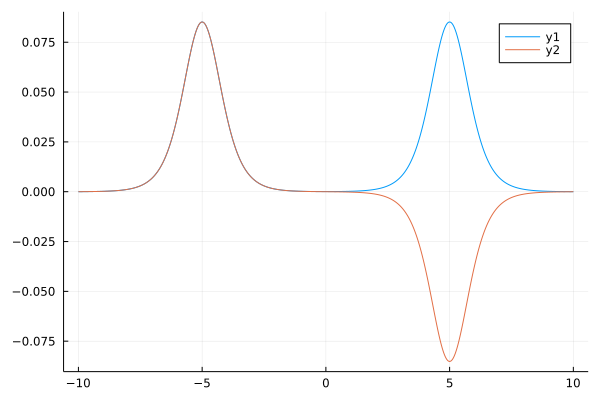

In [9]:
using Plots
plot(xvec,[mat_v2[:,1:2]])

これは、いわゆる「結合性軌道」と「反結合性軌道」となっている。

#### 1.1.3 ポテンシャルを二つ持つ場合の束縛状態:近づけた場合
さらに近づけるとどうなるだろうか？  
ポテンシャルを

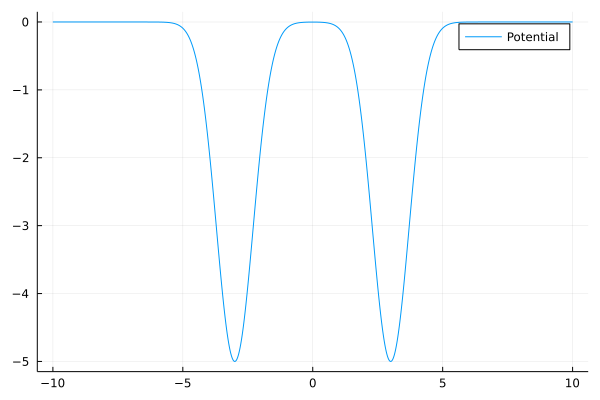

In [10]:
V0 = -5.0
x0 = 3
N = 1000
xmax = 10.0
xmin = -10.0
xvec = range(xmin,xmax,length=N)
V2(x) =  V0*(exp(-(x-x0)^2)+exp(-(x+x0)^2))
plot(xvec,V2.(xvec),label="Potential")

として、エネルギーを計算してみると、

ポテンシャル二つの時のエネルギー
[-3.140920983555882, -3.1398815968014215, -0.44595025974323477, -0.3552571780425424, 0.23882591948532816, 0.3086787489395739, 0.6213904023194616, 0.976257854228817, 1.2742974105308358, 1.7696233897102687]
ポテンシャル一つの時のエネルギー
[-3.1404009040145286, -0.4062142205546486, 0.10339356506001751, 0.15632796480264988, 0.4145932097452478, 0.5822287366538306, 0.9363743175283377, 1.2355092013437883, 1.6711811288154879, 2.0989689480359477]


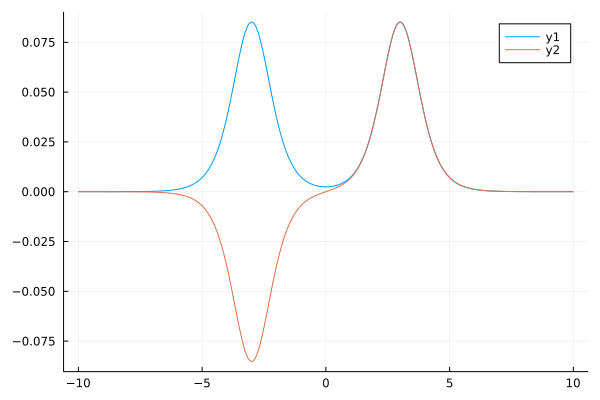

In [11]:
V0 = -5.0
x0 = 3
N = 1000
xmax = 10.0
xmin = -10.0
xvec = range(xmin,xmax,length=N)
mat_H2 = make_H1d(N,xmax,xmin,V2) 
energy2p,mat_v2 = eigen(mat_H2)
println("ポテンシャル二つの時のエネルギー")
println(energy2p[1:10])
println("ポテンシャル一つの時のエネルギー")
println(energy[1:10])
using Plots
plot(xvec,[mat_v2[:,1:2]])

となる。この場合、縮退が解けて、波動関数が足し算された「結合性軌道」の方がエネルギーが低い。
#### 1.1.3 周期的なポテンシャルの場合
固体の状況に近づけるため、さらにポテンシャルを周期的に配置してみる。

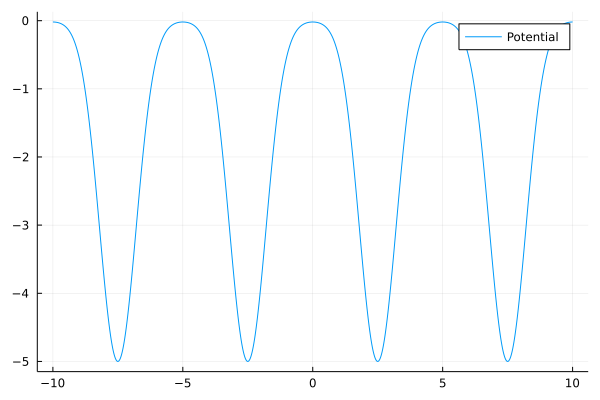

In [12]:
function Vp(x,V0,xmax,xmin,np)
    dx = (xmax-xmin)/(np-1)
    V3 = 0.0
    for i=1:np-1
        x0 = (i-1)*dx + xmin+dx/2
        V3 += V0*exp(-(x-x0)^2)+V0*exp(-(x-(xmax-xmin)-x0)^2)+V0*exp(-(x+(xmax-xmin)-x0)^2)
    end
    return V3
end

N = 2000
xmax = 10.0
xmin = -10.0

V3(x) =  Vp(x,V0,xmax,xmin,5)
plot(xvec,V3.(xvec),label="Potential")

そして、ハミルトニアンに周期境界条件を課す。

In [13]:
function make_H1dp(N,xmax,xmin,V)
    mat_H = zeros(Float64,N,N)
    a = (xmax-xmin)/(N-1)
        
    for i in 1:N
        x = (i-1)*a + xmin
        for dx in -1:1
            j = i + dx
            j += ifelse(j > N,-N,0)
            j+= ifelse(j <1,+N,0)
            
            v = 0.0
            if dx == 0                
                v = (2/a^2 + V(x))
            elseif dx == 1
                v = -1/a^2
            elseif dx == -1
                v = -1/a^2
            end
            
            if 1 <= j <= N
                mat_H[i,j] = v
            end
            
        end
        
    end
    
    return mat_H
end

make_H1dp (generic function with 1 method)

周期ポテンシャルの時のエネルギー
[-3.1464447984917503, -3.1404344051833117, -3.1403806125861387, -3.1342700928874323, -0.5439642693009712, -0.3966847995080151, -0.39613473223049867, -0.14398863565515585, 0.4934084688978966, 1.0192066655092875]
ポテンシャル一つの時のエネルギー
[-3.1404009040145286, -0.4062142205546486, 0.10339356506001751, 0.15632796480264988, 0.4145932097452478, 0.5822287366538306, 0.9363743175283377, 1.2355092013437883, 1.6711811288154879, 2.0989689480359477]


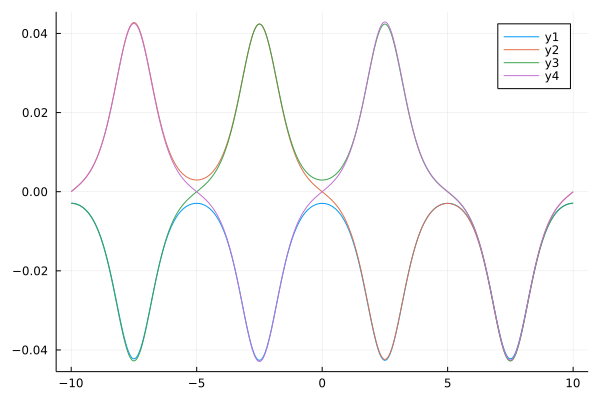

In [14]:
N = 2000
xmax = 10.0
xmin = -10.0
xvec = range(xmin,xmax,length=N)
V3(x) =  Vp(x,V0,xmax,xmin,5)
mat_H2 = make_H1dp(N,xmax,xmin,V3) 
energy4p,mat_v2 = eigen(mat_H2)
println("周期ポテンシャルの時のエネルギー")
println(energy4p[1:10])
println("ポテンシャル一つの時のエネルギー")
println(energy[1:10])
using Plots
plot(xvec,[mat_v2[:,1:4]])

ポテンシャルが四つあるので、低エネルギーの解は四つある。それぞれが結合や反結合的な形で足し合わされているのが見てとれる。
もともと四つのエネルギーが縮退していたが、縮退が解けた形になっている。
このままどんどんポテンシャルの数を増やしていけば、固体っぽい何かになるかもしれない。
しかし、ポテンシャルの数を増やせば増やすほど行列のサイズを大きくしていかなければならず、この方針はあまり筋が良くない。
もともと原子核の周りに束縛されていた電子がどのように振る舞うかを見たいので、束縛された電子だけを考える、という方向でやってみよう。
### 1.2 束縛状態だけを考えたシュレーディンガー方程式
簡単のため、最初に考えていたようなポテンシャル二つのケースについて考えてみよう。シュレーディンガー方程式は
$$
\left( -\frac{d^2}{dx^2} + V_1(x) + V_2(x) \right) \psi(x) = \epsilon \psi(x)
$$
と書くことができる。
ここで、
$$
V_1(x) = V_0 \exp(-(x-x_0)^2)
$$
$$
V_2(x) = V_0 \exp(-(x+x_0)^2)
$$
である。
もし、$x_0$が十分に大きいと、それぞれのポテンシャルの元に解いて得られた二つの束縛状態の解$\psi_1(x)$,$\psi_2(x)$はそれぞれ解である。
次に、$x_0$を小さくしていく。解の形として、
$$
\psi(x) = c_1 \psi_1(x) + c_2 \psi_2(x)
$$
を考えてみる。ここで、
$$
\left( -\frac{d^2}{dx^2} + V_1(x) \right) \psi_1(x) = \epsilon_0 \psi_1(x)
$$
$$
\left( -\frac{d^2}{dx^2} + V_2(x) \right) \psi_2(x) = \epsilon_0 \psi_2(x)
$$
が成り立っている。
仮定した解をシュレーディンガー方程式に代入すると、
$$
\left( -\frac{d^2}{dx^2} + V_1(x) + V_2(x) \right) (c_1 \psi_1(x) + c_2 \psi_2(x)) = \epsilon (c_1 \psi_1(x) + c_2 \psi_2(x))
$$
$$
\epsilon_0 c_1 \psi_1(x)  + V_2(x) c_1 \psi_1(x) + \epsilon_0 c_2 \psi_2(x)  + V_1(x) c_2 \psi_2(x) = \epsilon (c_1 \psi_1(x) + c_2 \psi_2(x))
$$
となり、$\psi_1(x)^{\ast}$を左からかけて全空間で積分すると、
$$
\epsilon_0 c_1   +c_1 \int |\psi_1(x)|^2 V_2(x) dx    + c_2 \int \psi_1(x)^{\ast} \psi_2(x) V_1(x) dx +\epsilon_0 c_2 \int \psi_1(x)^{\ast} \psi_2(x)dx = \epsilon c_1 
$$
となり、$\psi_2(x)^{\ast}$を左からかけて全空間で積分すると、
$$
\epsilon_0 c_1 \int \psi_2(x)^{\ast} \psi_1(x) dx+ c_1 \int \psi_2(x)^{\ast} \psi_1(x)V_2(x) dx + \epsilon_0 c_2   + c_2 \int V_1(x)|\psi_2(x)|^2 dx= \epsilon  c_2 
$$
となる。
これらを行列表記すると、
$$
\left( 
\begin{matrix}
\epsilon_0 +\int |\psi_1(x)|^2 V_2(x)dx  & \int \psi_1(x)^{\ast} \psi_2(x) (V_1(x)+\epsilon_0)dx \\
\int \psi_2(x)^{\ast} \psi_1(x)( V_2(x)+\epsilon_0) dx & \epsilon_0 +\int V_1(x)|\psi_2(x)|^2 dx
\end{matrix}
\right)
\left( 
\begin{matrix}
c_1  \\
c_2  
\end{matrix}
\right) = \epsilon \left( 
\begin{matrix}
c_1  \\
c_2  
\end{matrix}
\right)
$$
となる。

さて、この方程式も固有値問題となっている。Juliaで実際に計算してみよう。
まず、$\psi_1(x)$は

-3.1403506852520637


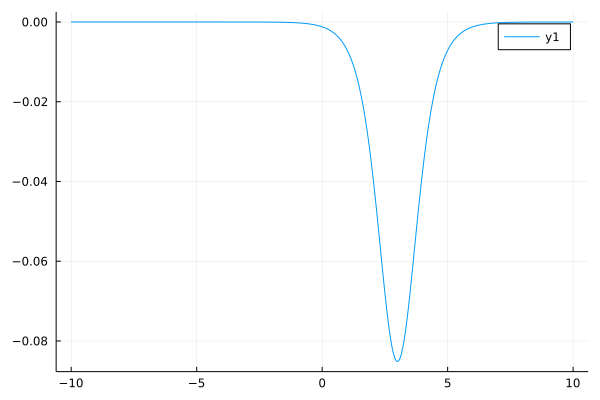

In [15]:
x0 = 3
N = 2000
xmax = 10.0
xmin = -10.0
xvec = range(xmin,xmax,length=N)
V1(x) =  V0*exp(-(x-x0)^2)
mat_H1 = make_H1dp(N,xmax,xmin,V1) 
energy1,mat_v1 = eigen(mat_H1)
ψ1 = mat_v1[:,1]
println(energy1[1])
using Plots
plot(xvec,ψ1)

次に、$\psi_2(x)$は

-3.140350685252034


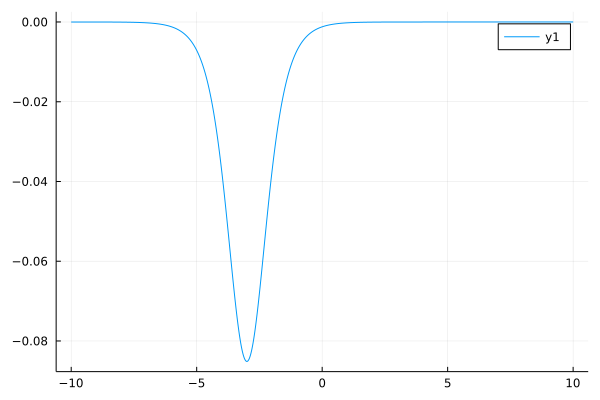

In [16]:
V2(x) =  V0*exp(-(x+x0)^2)
mat_H2 = make_H1dp(N,xmax,xmin,V2) 
energy2,mat_v2 = eigen(mat_H2)
println(energy2[1])
ψ2 = mat_v2[:,1]
using Plots
plot(xvec,ψ2)

となるので、行列は

In [17]:
function calc_Htb(energy1,ψ1,ψ2,vecV1)
    mat_Htb = zeros(Float64,2,2)
    
    t = 0.0
    v0 = 0.0
    N = length(ψ1)
    for i=1:N        
        t += (energy[1]+vecV1[i])*ψ1[i]*ψ2[i]
        v0 += vecV1[i]*ψ2[i]*ψ2[i]
    end
    mat_Htb[1,1] = energy[1]+v0
    mat_Htb[1,2] = t
    mat_Htb[2,1] = t
    mat_Htb[2,2] = energy[1]+v0
 
    
    return mat_Htb
end

calc_Htb (generic function with 1 method)

In [18]:
N = 2000
xmax = 10.0
xmin = -10.0
vecV1 = zeros(Float64,N)
dx = (xmax-xmin)/(N-1)
for i=1:N
    x = (i-1)*dx+xmin
    vecV1[i] = V1(x) 
end
mat_Htb = calc_Htb(energy1,ψ1,ψ2,vecV1)

2×2 Matrix{Float64}:
 -3.1404      -0.00306652
 -0.00306652  -3.1404

となる。

In [20]:
ε,c = eigen(mat_Htb)
println(ε)
println(c[1:2,1])

[-3.1434681456481526, -3.1373351107965433]
[0.7071067811865475, 0.7071067811865475]


最低固有値の固有関数は、結合性軌道であることがわかる。

In [22]:
V0 = -5.0
x0 = 3

xvec = range(xmin,xmax,length=N)
V12(x) =  V0*(exp(-(x-x0)^2)+exp(-(x+x0)^2))
mat_H2 = make_H1dp(N,xmax,xmin,V12) 
energy2p,mat_v2 = eigen(mat_H2)
println("ポテンシャル二つの時のエネルギー")
println(energy2p[1:10])


ポテンシャル二つの時のエネルギー
[-3.1408706997702507, -3.139831443637112, -0.44623596291542933, -0.35515999810553556, 0.07018456954411345, 0.310156460019972, 0.42911267028300504, 0.894830194668943, 0.9798593010634473, 1.7431435321999604]


値は少しだけずれているが、だいたい再現していると言える。このズレは、離散化や積分の誤差から来ているかもしれない。

### 1.3 タイトバインディング模型
さて、最後に作った行列は、$2\times 2$のサイズであった。この形まで持ってくると、もはやどのような束縛状態であったのかは見た目からはわからない。
束縛状態の形は、この行列の非対角要素や対角要素の値に反映されている。  
つまり、原子核に電子が束縛されている時も同じような方法で束縛状態だけを取ってくることで、簡単な行列の形に持ってくることができる。
これが「タイトバインディング模型」である。  
固体中の物質の性質は、「束縛された電子の波動関数がとなりとどのくらいオーバーラップしているか」で決まっている。

最後に、ポテンシャルが四つある場合をこの模型で再現してみよう。簡単のため、対角要素に入っていた積分は全てゼロと置き、非対角要素だけを考える。また、束縛状態は十分に局在しているため、オーバーラップは隣以外を無視する。
この時、ハミルトニアンは、


In [23]:
function calc_HtbModel(energy1,ψ1,ψ2,vecV1,Nx)
    mat_Htb = zeros(Float64,Nx,Nx)
    
    t = 0.0
    v0 = 0.0
    N = length(ψ1)
    for i=1:N        
        t += (energy[1]+vecV1[i])*ψ1[i]*ψ2[i]
    end
    
    for i =1:Nx
        for dx in -1:1
            j = i + dx
            j += ifelse(j > Nx,-Nx,0)
            j += ifelse(j < 1,Nx,0)
            
            if dx ==0
                mat_Htb[i,j] = energy[1]
            elseif abs(dx) == 1   
                mat_Htb[i,j] = t    
            end
        end
    end 
    
    return mat_Htb
end

calc_HtbModel (generic function with 1 method)

In [24]:
N = 2000
xmax = 10.0
xmin = -10.0
vecV1 = zeros(Float64,N)
dx = (xmax-xmin)/(N-1)
for i=1:N
    x = (i-1)*dx+xmin
    vecV1[i] = V1(x) 
end
mat_Htb = calc_HtbModel(energy1,ψ1,ψ2,vecV1,4)

4×4 Matrix{Float64}:
 -3.1404      -0.00306652   0.0         -0.00306652
 -0.00306652  -3.1404      -0.00306652   0.0
  0.0         -0.00306652  -3.1404      -0.00306652
 -0.00306652   0.0         -0.00306652  -3.1404

In [25]:
ε4,c4 = eigen(mat_Htb)
println(ε4)
println(c4[:,1])
println(energy4p[1:10])

[-3.1465339388661384, -3.1404009040145286, -3.1404009040145286, -3.134267869162919]
[-0.4999999999999999, -0.5000000000000007, -0.4999999999999999, -0.4999999999999991]
[-3.1464447984917503, -3.1404344051833117, -3.1403806125861387, -3.1342700928874323, -0.5439642693009712, -0.3966847995080151, -0.39613473223049867, -0.14398863565515585, 0.4934084688978966, 1.0192066655092875]


となるので、エネルギーはよく一致している。  
### 1.4 このノートのまとめ
以上から、電子の束縛状態同士が近い場合、その波動関数のオーバーラップによってエネルギーの縮退が解けることがわかった。
また、このオーバーラップを非対角要素とした模型「タイトバインディング模型」を使うことで、それぞれの束縛状態の情報をホッピングの強弱に押し込めることができた。
また、このような模型を用いることにより、取り扱える長さスケールが大幅に長くなったことも注目すべきである。つまり、もともとは微分方程式を差分化した差分化の幅など非常に小さな長さスケールを使って方程式を議論していたが、タイトバインディング模型に変えたことにより、最小の長さスケールはポテンシャルとポテンシャルの距離、つまり原子間距離にまで伸びた。これによって、原子が数百並んだような問題を考えることができるようになり、トポロジカル絶縁体など端が重要となる物理を議論することができるようになる。

なお、実際の電子は水素原子のように、s軌道、d軌道、p軌道などの束縛状態を持つ。そして、s軌道とs軌道、s軌道とp軌道の重なり積分がどうなっているか、ということを用いたモデルの構築方法は、「Slater-Kosterの方法」と呼ばれている。  
http://wyvern.phys.s.u-tokyo.ac.jp/f/lecture/corrcondmat/slater-koster.htm   
このウェブサイトに、それぞれの値がまとめられている。  

ここまでは一次元シュレーディンガー方程式から出発してタイトバインディング模型の導出までであったが、次回以降は、フェルミ統計性を利用して固体中の物性について述べようと思う。